# Attrition rate reduction notebook
This is my submission for HR attrition reduction where we want to know which employees are more likely to leave using historical data of these employees

These are the imports we will be using in our project

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Data split
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import imblearn


## Importing the dataset

In [215]:
path = 'E:\courses\DataAnalysis\data_science_projects\Human_resources_attrition\data\Human_resources.csv'

h_r_df = pd.read_csv(path)

## Checking missing data

In [216]:
#No missing data
h_r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Checking the distribution of the columns

In [217]:
h_r_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [218]:
#EmployeeCount ,Over18 ,StandardHours columns don`t vary , so we will remove them
h_r_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [219]:
cols = ['EmployeeCount' ,'Over18' ,'StandardHours' , 'EmployeeNumber']
h_r_df.drop(cols , axis = 1 , inplace = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

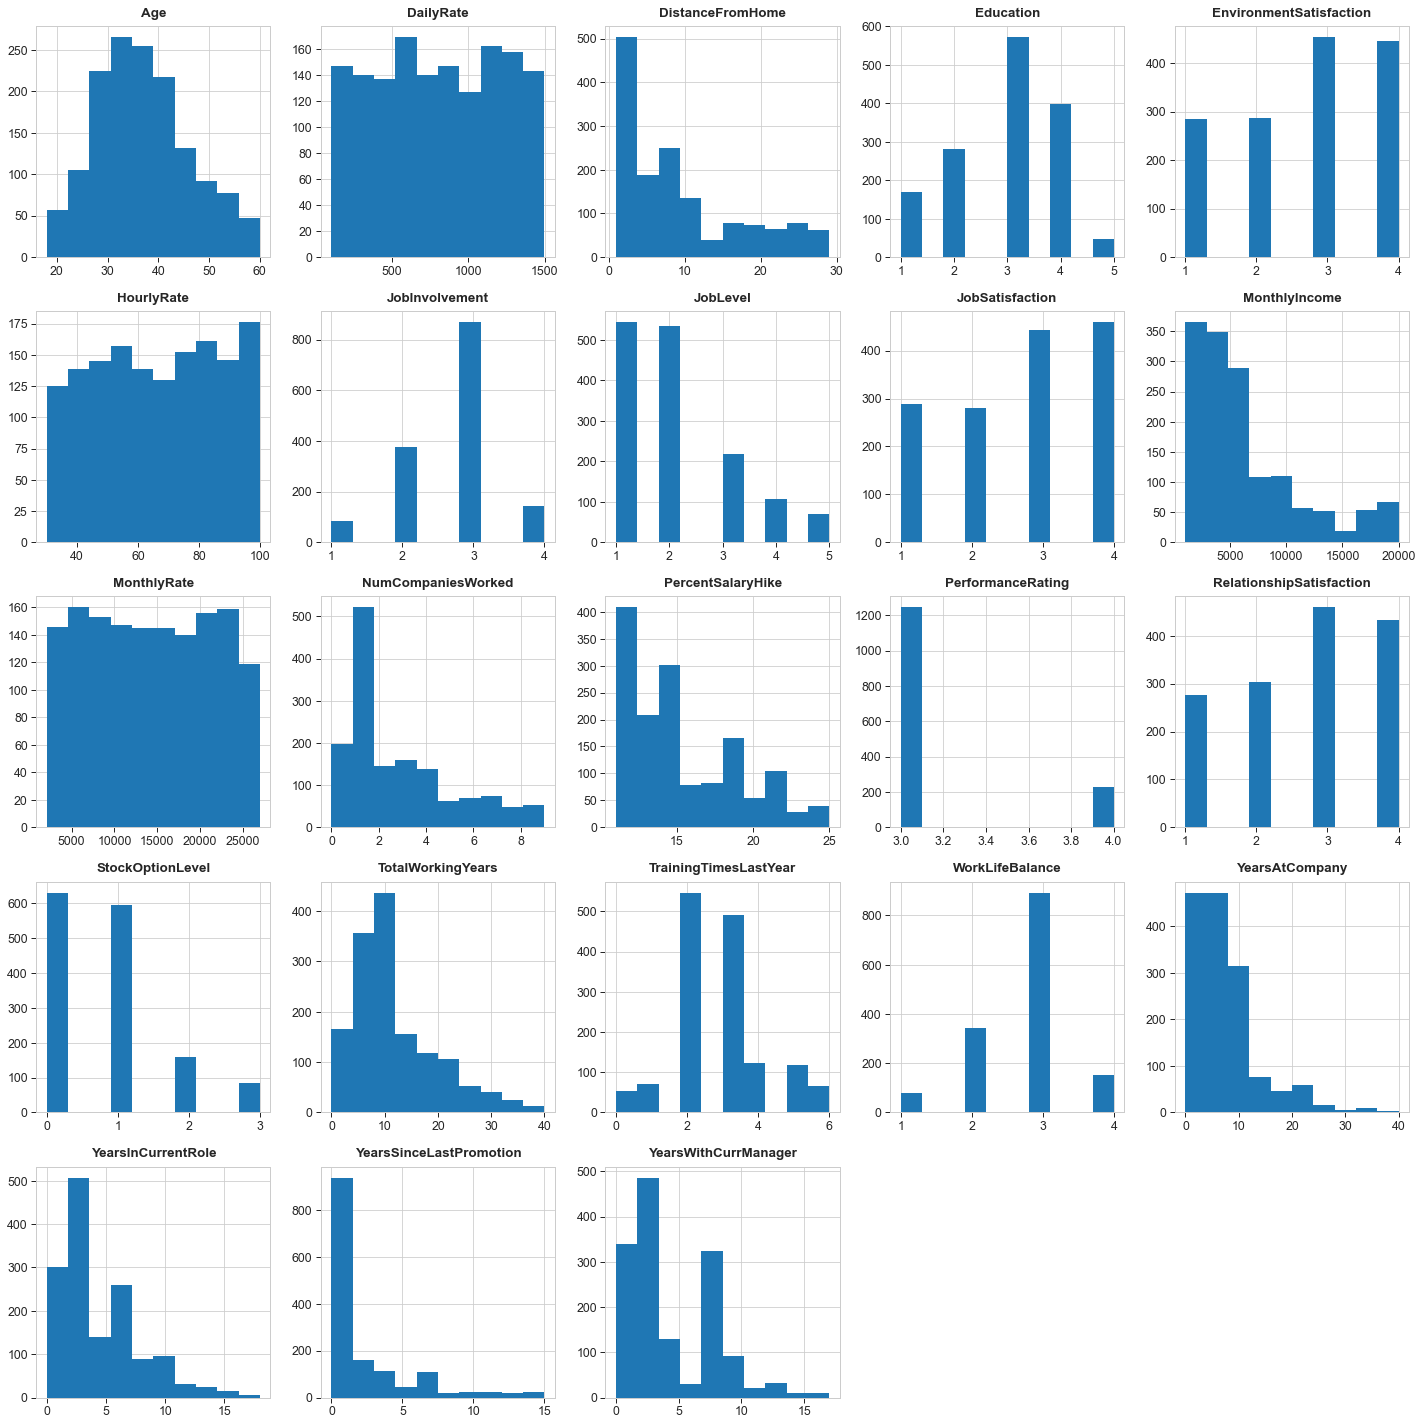

In [220]:
#as we can see from the histogram The attrition data is unbalanced we have to keep that in mind
#also columns are in different ranges so we will need to scale the values of the columns
h_r_df.hist(figsize = (20,20))

<AxesSubplot:>

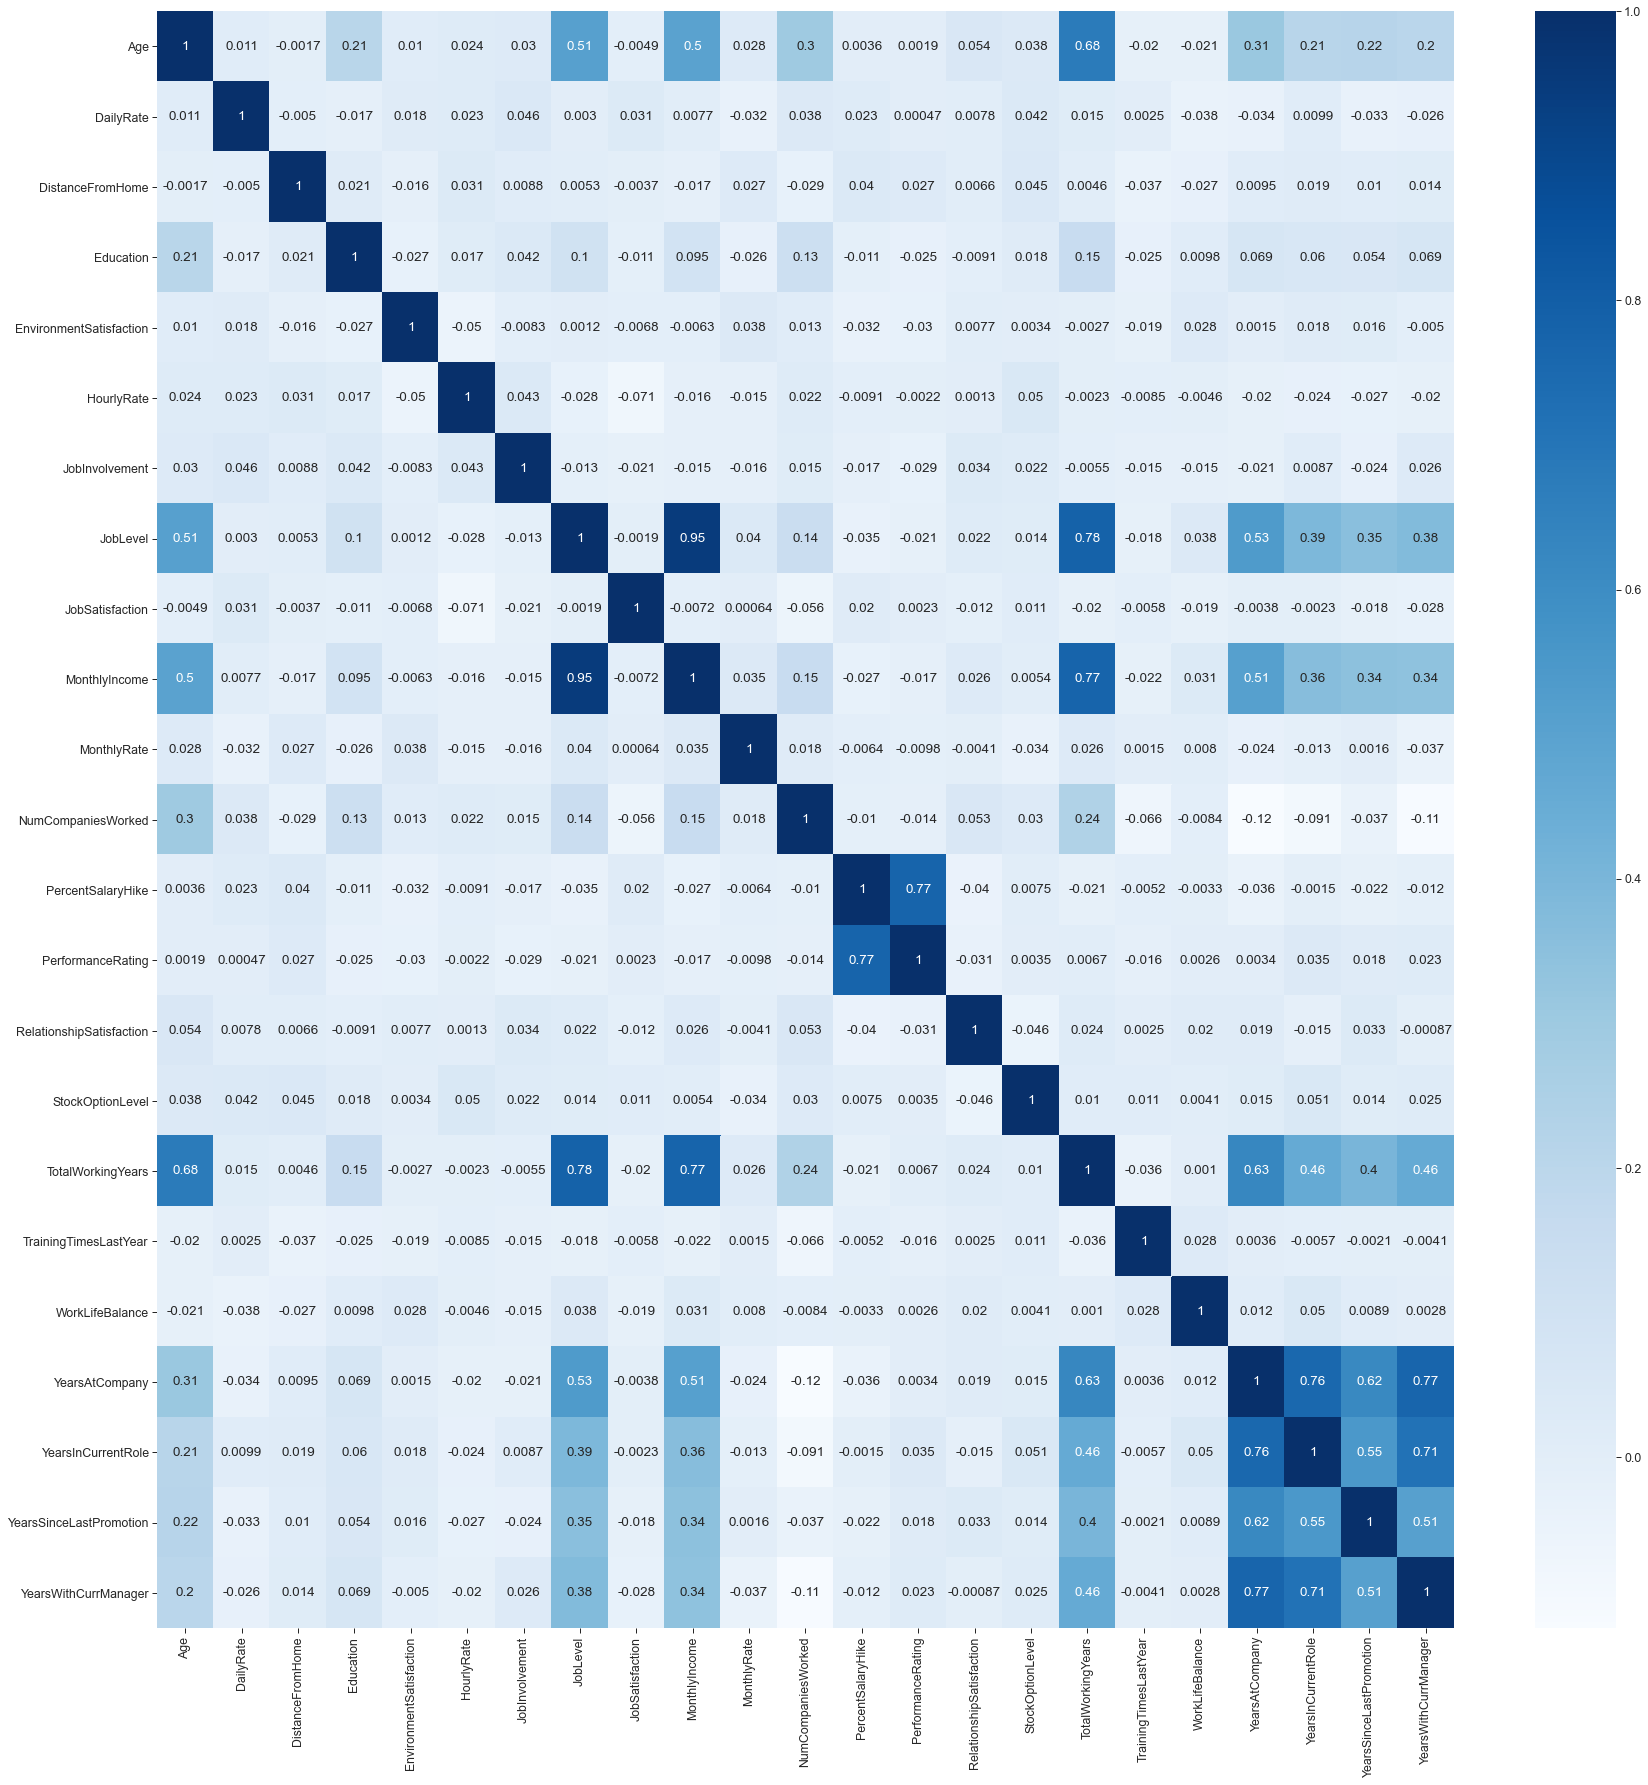

In [221]:
#We can see that there are some variables that we can drop as they are highly corelated with others
corelations = h_r_df.corr()
plt.figure(figsize=(25,25))
sns.set_context('paper', font_scale=1.4)

# Create the heatmap, add annotations and a color map
sns.heatmap(corelations, annot=True, cmap='Blues')

In [222]:
cat_cols = []
for col in h_r_df.columns:
    if h_r_df[col].dtype == 'object' :
        cat_cols.append(col)
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Some features need more investigation Like Monthly income , MonthlyRate , DailyRate , HourlyRate as they dont seem to have many variations

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

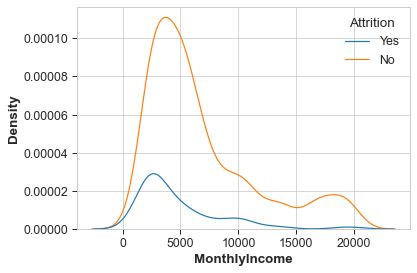

In [223]:
print(h_r_df['MonthlyIncome'].describe())
sns.kdeplot(h_r_df['MonthlyIncome'] , hue = h_r_df['Attrition'])

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

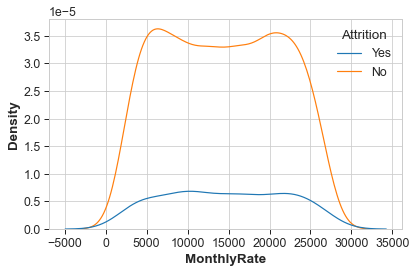

In [224]:
print(h_r_df['MonthlyRate'].describe())
sns.kdeplot(h_r_df['MonthlyRate'] , hue = h_r_df['Attrition'])

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

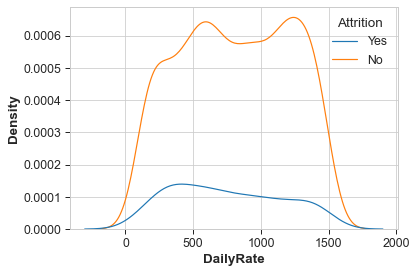

In [225]:
print(h_r_df['DailyRate'].describe())
sns.kdeplot(h_r_df['DailyRate'] , hue = h_r_df['Attrition'])

In [226]:
h_r_df[['MonthlyIncome','MonthlyRate' , 'DailyRate']].head(50)

,MonthlyIncome,MonthlyRate,DailyRate
0,5993,19479,1102
1,5130,24907,279
2,2090,2396,1373
3,2909,23159,1392
4,3468,16632,591
5,3068,11864,1005
6,2670,9964,1324
7,2693,13335,1358
8,9526,8787,216
9,5237,16577,1299


<AxesSubplot:xlabel='JobRole', ylabel='count'>

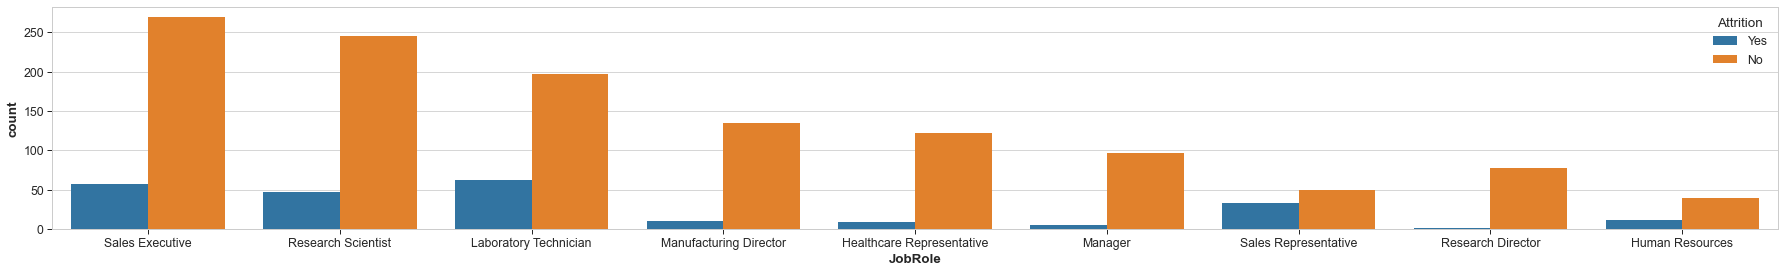

In [227]:
#Sales Representatives  have high Attrition rate  , while Research directors and manufacturincg directors and healthcare representatives tend to stay more 
plt.figure(figsize=(25,4))
sns.countplot(x='JobRole',data=h_r_df , hue = 'Attrition')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

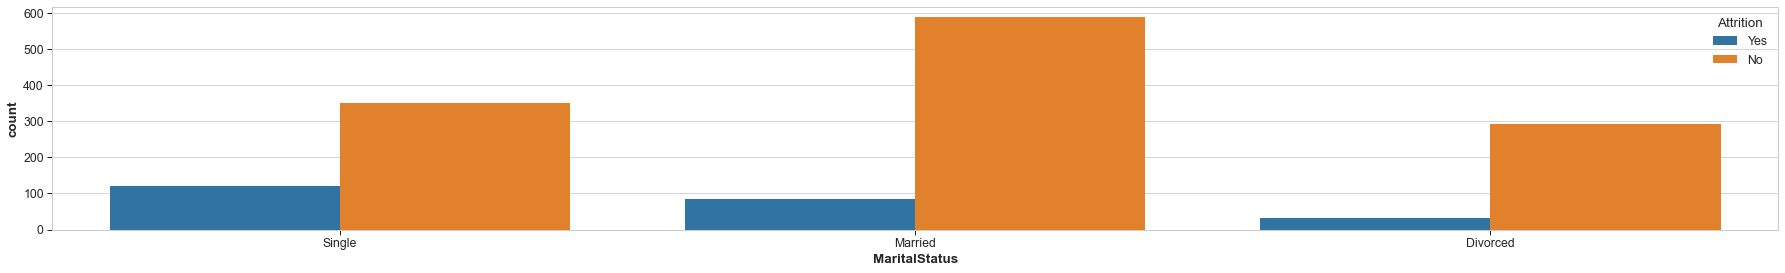

In [228]:
#Single employees tend to leave more
plt.figure(figsize=(25,4))
sns.countplot(x='MaritalStatus',data=h_r_df , hue = 'Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

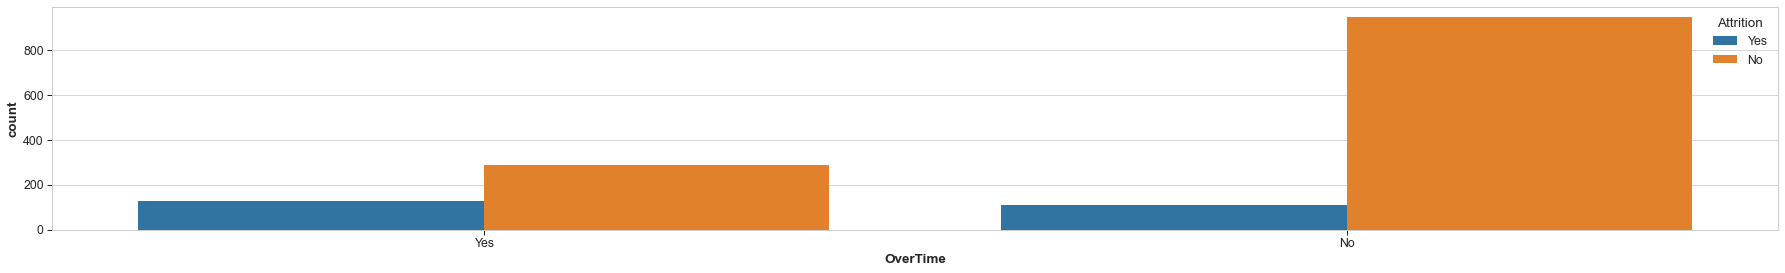

In [229]:
#Employees with Overtime tend to leave more
plt.figure(figsize=(25,4))
sns.countplot(x='OverTime',data=h_r_df , hue = 'Attrition')

#### By checking the distribution of the columns we have concluded that 
- Our target ('Attrition') is unbalanced
- These columns do not have any variations so they need to be removed
- Some columns are highly corelated Like JobLevel , MonthlyIncome so we need to keep that in mind in case of we need to reduce our features
- Most columns are in different scales from each other so we will need to rescale our data
- We need to understand these features more Monthly income , MonthlyRate , DailyRate , HourlyRate


## Checking categorical columns

In [230]:
#Now we will check our categorical columns to see what are the suitable encoding techniques
#One hot encoding fits most of the categorical variables except for BusinessTravel column where ordinal encing might be more suitable
#and for attrition column we will label encode it as it`s the target
for col in cat_cols:
    print(h_r_df[col].value_counts() )
    print('\n')

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


No     1054
Yes     416
Name: OverTime, dtype: int64




#### After checking the categorical columns we have concluded that 
- One hot encoding fits most of the categorical variables except for BusinessTravel column where ordinal encing might be more suitable
- and for attrition column we will label encode it as it is the target

## Splitting our data 

In [231]:
one_hot_cols = cat_cols.copy()
one_hot_cols.remove('BusinessTravel')
one_hot_cols.remove('Attrition')

label_cols = ['BusinessTravel']

num_cols = h_r_df.select_dtypes(exclude='object').columns.values.tolist()


In [232]:
X = h_r_df.copy()
y = X['Attrition'].copy()
y = y.apply(lambda x : 1 if x == 'Yes' else 0 )
X.drop('Attrition' , axis = 1 , inplace = True)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2 ,stratify = y,  random_state = 0)

## Evaluating our model
We will use a confusion matrix to evaluate our model and our primary goal will be to optimize The recall

In [233]:
def evaluate(y_test , y_pred) : 
    cm = confusion_matrix(y_test,y_pred) 
    print(classification_report(y_test, y_pred))
    return cm


## Preprocessing
- We will first rescale our data
- Then we will use Onehot encoding to  Department, EducationField , Gender , JobRole , MaritalStatus , OverTime
- we will apply ordinal encoding to BusinessTravel

In [234]:
# Bundle preprocessing categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler() , num_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_cols),
        ('ordinal', OrdinalEncoder(), label_cols)
    ])

## Oversampling and undersampling
After applying oversampling and undersampling techniques to our data , undersampling worked better in optimizing the recall 

In [235]:
#oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
#train_X, train_y = oversample.fit_resample(train_X, train_y)

undersample = imblearn.under_sampling.RandomUnderSampler(sampling_strategy='majority')
train_X, train_y = undersample.fit_resample(train_X, train_y)


## KNN model
It had very bad recall rate

In [236]:
#Knn model
#model = KNeighborsClassifier(n_neighbors=5)        #too bad at classifying TN


## Logistic regression
- recall is 0.79 , 0.65 for using cost function modifier
- recall is 0.8 , 0.68 for random over_sampling
- recall is 0.78 , 0.75 for random undersampling


In [237]:
#model = LogisticRegression( random_state=0)

## XGBOOST classifier
The best performing algorithm so far using grid search tuning for max depth= 9 and n_estimators = 900 

In [238]:
model = XGBClassifier(max_depth=9, n_estimators=900, learning_rate=0.043, colsample_bytree=0.5, subsample=0.8)

## Testing

In [239]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model' , model)
                             ])

In [240]:
#Grid search
#params = {}
#params['model__max_depth'] = [3,4,5,6,7,8,9,10]
#params['model__n_estimators'] = [700 , 800,900,1000]
##params['model__learning_rate'] = [0.04 , 0.08 , 0.1 , 0.2]
#
#grid = GridSearchCV(my_pipeline , params , cv = 5 , scoring = 'accuracy')
#
#grid.fit(X,y)
#
#print(grid.best_score_)
#print(grid.best_params_)

In [241]:
# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

preds = my_pipeline.predict_proba(val_X)[:,1] >=0.5

conf_matrix = evaluate(val_y , preds)

conf_matrix

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       247
           1       0.36      0.70      0.47        47

    accuracy                           0.75       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.84      0.75      0.78       294



array([[188,  59],
       [ 14,  33]], dtype=int64)

In [242]:
preds = my_pipeline.predict_proba(X)[:,1] >=0.5

conf_matrix = evaluate(y , preds)

conf_matrix

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      1233
           1       0.47      0.94      0.62       237

    accuracy                           0.82      1470
   macro avg       0.73      0.87      0.75      1470
weighted avg       0.90      0.82      0.84      1470



array([[977, 256],
       [ 14, 223]], dtype=int64)

In [127]:
#For testing purposes
############################################################################################################
############################################################################################################
############################################################################################################
#used for ploting the variance of each component
############################################################################################
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
############################################################################################
X_test = X.loc[: , num_cols]
X_scaled = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()


loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_test.columns,  # and the rows are the original features
)




############################################################################################################
############################################################################################################
############################################################################################################

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

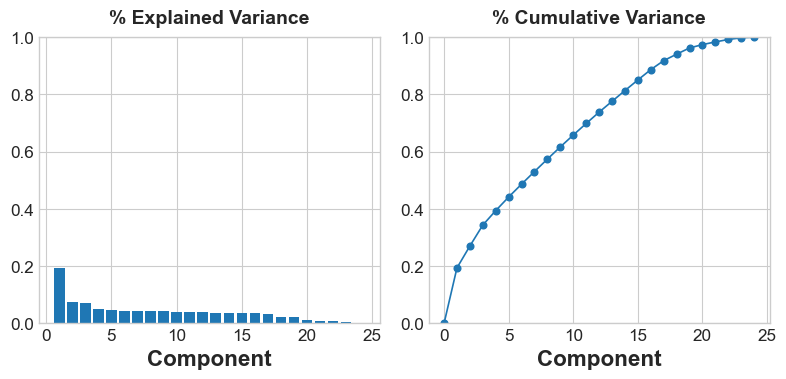

In [132]:
plot_variance(pca)

In [127]:
X_scaled.shape

(1470, 24)